In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Gas production by country.csv')
df.head(10)

,Entity,Code,Year,Gas production (TWh)
0,Africa,NaN,1900,0.0
1,Africa,NaN,1901,0.0
2,Africa,NaN,1902,0.0
3,Africa,NaN,1903,0.0
4,Africa,NaN,1904,0.0
5,Africa,NaN,1905,0.0
6,Africa,NaN,1906,0.0
7,Africa,NaN,1907,0.0
8,Africa,NaN,1908,0.0
9,Africa,NaN,1909,0.0


In [2]:
df['Entity'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Asia Pacific', 'Asia and Oceania', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'CIS', 'Cambodia', 'Cameroon', 'Canada',
       'Central and South America', 'Chile', 'China', 'Colombia', 'Congo',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Eurasia', 'Europe', 'European Union',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Libya', 'Lithuania', 'Malaysia'

## Visualising the trend of gas production by individual country/region

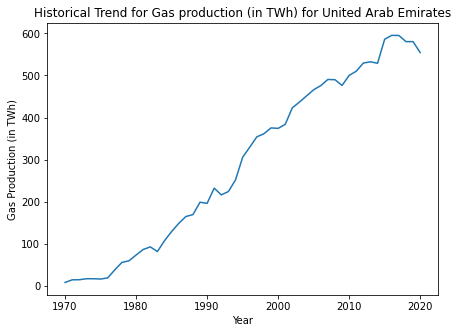

In [14]:
country_name = 'United Arab Emirates'
country = df.loc[df['Entity'] == country_name]

plt.figure(figsize = (7, 5))

plt.plot(country['Year'], country['Gas production (TWh)'])

plt.title('Historical Trend for Gas production (in TWh) for {0}'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Gas Production (in TWh)')

plt.show()

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

In [4]:
df

,Entity,Code,Year,Gas production (TWh)
0,Africa,NaN,1900,0.0
1,Africa,NaN,1901,0.0
2,Africa,NaN,1902,0.0
3,Africa,NaN,1903,0.0
4,Africa,NaN,1904,0.0
...,...,...,...,...
10409,Zimbabwe,ZWE,2012,0.0
10410,Zimbabwe,ZWE,2013,0.0
10411,Zimbabwe,ZWE,2014,0.0
10412,Zimbabwe,ZWE,2015,0.0


### Sort by region

In [5]:
non_countries = ['Africa', 'Asia Pacific', 'Asia and Oceania', 'CIS', 'Central and South America', 'Eurasia', 
                 'Europe', 'European Union', 'Middle East', 'Non-OECD', 'OECD', 'OPEC', 'Persian Gulf',
                 'Russian Federation & USSR', 'USSR', 'World']

In [6]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Gas production (TWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
10284,World,OWID_WRL,2016,35520.701
10285,World,OWID_WRL,2017,36762.143
10286,World,OWID_WRL,2018,38528.565
10287,World,OWID_WRL,2019,39762.119


### Sort by country

In [7]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Gas production (TWh)
121,Albania,ALB,1900,0.0
122,Albania,ALB,1901,0.0
123,Albania,ALB,1902,0.0
124,Albania,ALB,1903,0.0
125,Albania,ALB,1904,0.0
...,...,...,...,...
10409,Zimbabwe,ZWE,2012,0.0
10410,Zimbabwe,ZWE,2013,0.0
10411,Zimbabwe,ZWE,2014,0.0
10412,Zimbabwe,ZWE,2015,0.0


## Top 10 Individual Countries with highest Mean Gas Production

In [35]:
allgpc = df_country.groupby(['Entity'])['Gas production (TWh)'].mean()
tgpc = allgpc.nlargest(10)
tgpc

Entity
Russia                  5734.545583
United States           3210.585744
Iran                     702.038392
Canada                   571.947041
Turkmenistan             549.829333
Uzbekistan               491.192417
Saudi Arabia             459.736118
United Arab Emirates     292.452980
Netherlands              273.045901
Venezuela                247.122882
Name: Gas production (TWh), dtype: float64

## Bar plots for gas production for the Top 10 Individual Countries with highest Mean Gas Production

In [36]:
tgpc.index

Index(['Russia', 'United States', 'Iran', 'Canada', 'Turkmenistan',
       'Uzbekistan', 'Saudi Arabia', 'United Arab Emirates', 'Netherlands',
       'Venezuela'],
      dtype='object', name='Entity')

In [37]:
df_tgpc = df[df['Entity'].isin(tgpc.index)]
df_tgpc

,Entity,Code,Year,Gas production (TWh)
2127,Canada,CAN,1900,0.000
2128,Canada,CAN,1901,0.000
2129,Canada,CAN,1902,0.000
2130,Canada,CAN,1903,0.000
2131,Canada,CAN,1904,0.000
...,...,...,...,...
10112,Venezuela,VEN,2016,372.387
10113,Venezuela,VEN,2017,386.054
10114,Venezuela,VEN,2018,316.191
10115,Venezuela,VEN,2019,255.762


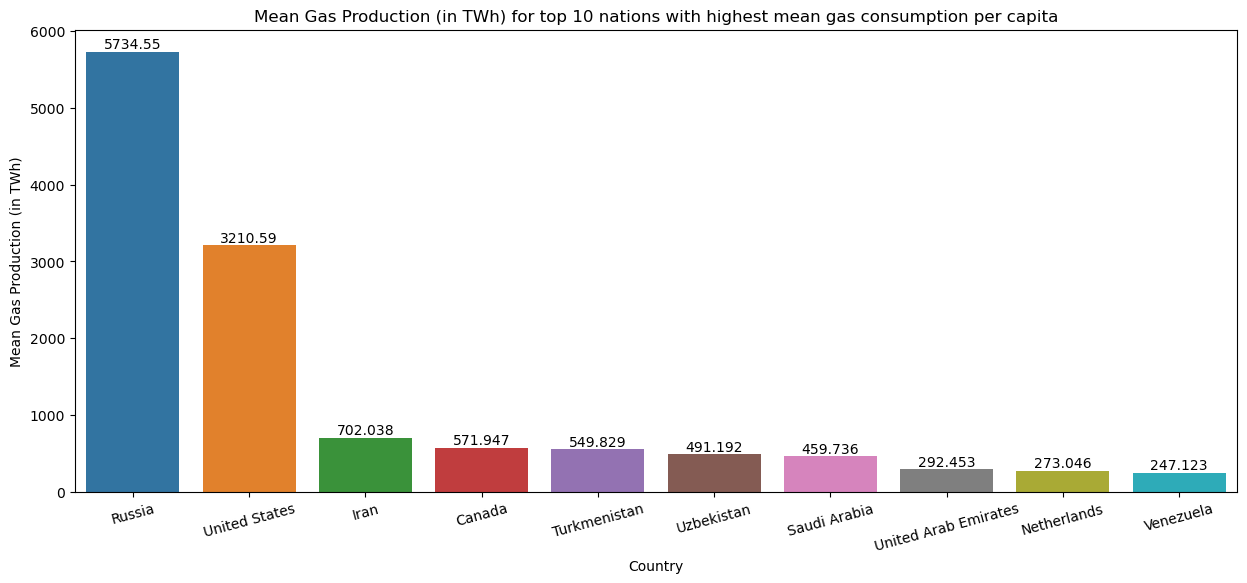

In [68]:
plt.figure(figsize = (15, 6))
plt.style.use('default')

ax = sns.barplot(x = 'Entity', y = 'Gas production (TWh)', data = df_tgpc, ci = None, order = tgpc.index)
ax.bar_label(ax.containers[0])

plt.title('Mean Gas Production (in TWh) for top 10 nations with highest mean gas consumption per capita')
plt.ylabel('Mean Gas Production (in TWh)')
plt.xlabel('Country')
plt.xticks(rotation = 15)

plt.show()

## Historical Trend of top 10 countries with highest gas production (in TWh) as of the year 2020

In [42]:
gcpc2020 = df_country.loc[df_country['Year'] == 2020]
tgpcc = gcpc2020.nlargest(10, 'Gas production (TWh)')
tgpcc

,Entity,Code,Year,Gas production (TWh)
9992,United States,USA,2020,9146.210
8432,Russia,RUS,2020,6384.897
4789,Iran,IRN,2020,2507.862
2602,China,CHN,2020,1940.143
8275,Qatar,QAT,2020,1713.187
2247,Canada,CAN,2020,1651.949
910,Australia,AUS,2020,1425.160
8600,Saudi Arabia,SAU,2020,1121.001
7204,Norway,NOR,2020,1114.543
358,Algeria,DZA,2020,814.564


In [43]:
df_tgpcc = df_country[df_country['Entity'].isin(tgpcc['Entity'].values)]
df_tgpcc

,Entity,Code,Year,Gas production (TWh)
238,Algeria,DZA,1900,0.000
239,Algeria,DZA,1901,0.000
240,Algeria,DZA,1902,0.000
241,Algeria,DZA,1903,0.000
242,Algeria,DZA,1904,0.000
...,...,...,...,...
9988,United States,USA,2016,7273.561
9989,United States,USA,2017,7461.707
9990,United States,USA,2018,8409.362
9991,United States,USA,2019,9299.875


### Rearranging list for ordered plt.legend()

In [44]:
entity_sort = list(tgpcc.sort_values('Entity')['Entity'].values)
entity_sort

['Algeria',
 'Australia',
 'Canada',
 'China',
 'Iran',
 'Norway',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'United States']

In [45]:
new_sort = list(tgpcc['Entity'])
new_sort 

['United States',
 'Russia',
 'Iran',
 'China',
 'Qatar',
 'Canada',
 'Australia',
 'Saudi Arabia',
 'Norway',
 'Algeria']

In [46]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[9, 7, 4, 3, 6, 2, 1, 8, 5, 0]

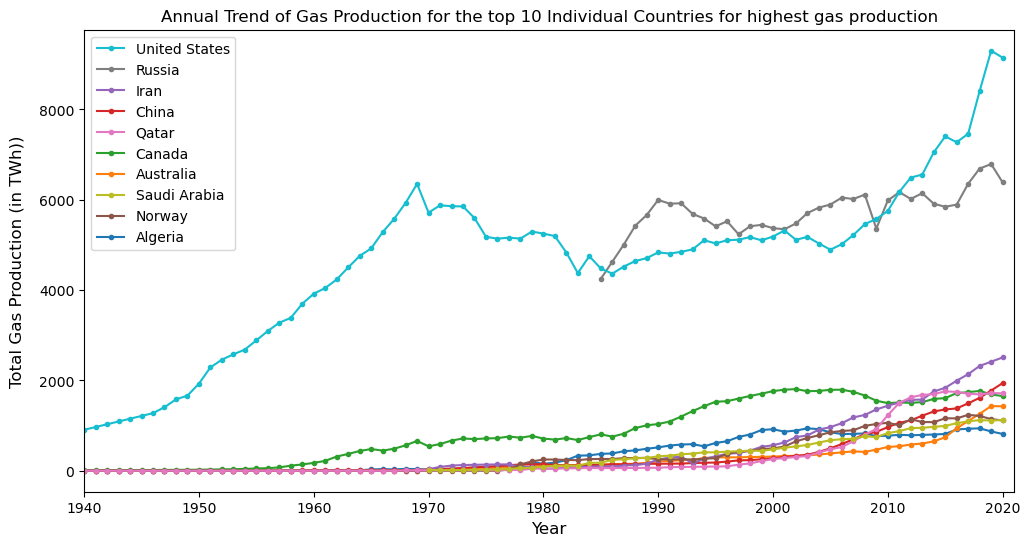

In [50]:
fig, ax = plt.subplots(figsize = (12, 6))

for gpc, group in df_tgpcc.groupby('Entity'):
    group.plot(x = 'Year', y = 'Gas production (TWh)', ax = ax, label = gpc, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Gas Production (in TWh))', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Gas Production for the top 10 Individual Countries for highest gas production')
plt.xlim(1940, 2021)

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 10)

plt.show()

## Historical Trend of Gas production in different regions of the world, as of 2020

In [60]:
df_region

,Entity,Code,Year,Gas production (TWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
10284,World,OWID_WRL,2016,35520.701
10285,World,OWID_WRL,2017,36762.143
10286,World,OWID_WRL,2018,38528.565
10287,World,OWID_WRL,2019,39762.119


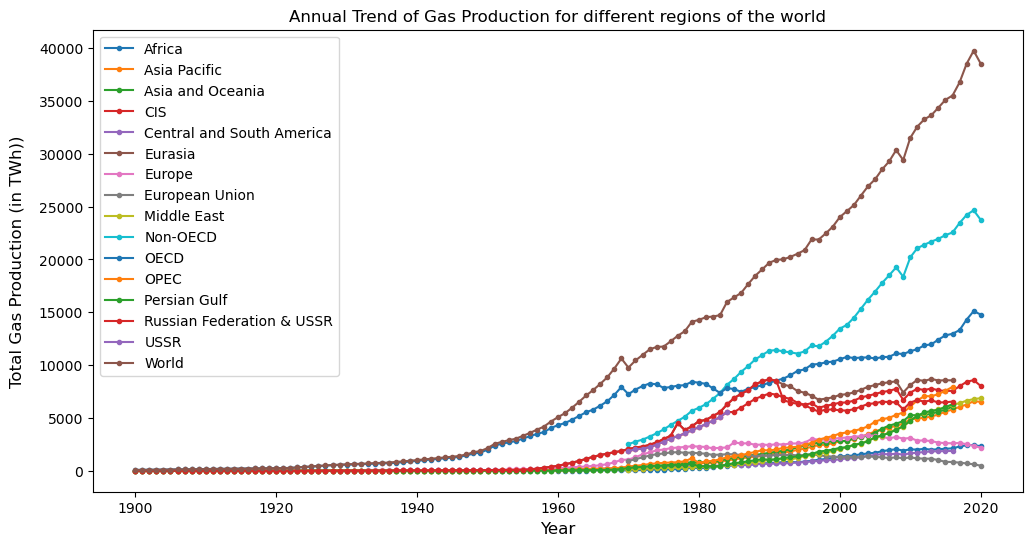

In [62]:
fig, ax = plt.subplots(figsize = (12, 6))

for gpr, group in df_region.groupby('Entity'):
    group.plot(x = 'Year', y = 'Gas production (TWh)', ax = ax, label = gpr, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Gas Production (in TWh))', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Gas Production for different regions of the world')

plt.legend()
plt.show()